In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
df1=pd.read_csv("DF.csv")
df2=pd.read_excel("DF diff.xlsx")

In [11]:
df1

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date,WOR,WOR',Month_
0,118.3,0.0,1/1/1997,0.000000,0.000000,3
1,9126.6,0.0,2/1/1997,0.000000,0.000000,6
2,13228.3,0.0,3/1/1997,0.000000,0.000000,10
3,10417.0,0.0,4/1/1997,0.000000,0.000000,15
4,7370.6,0.0,5/1/1997,0.000000,0.000000,21
...,...,...,...,...,...,...
306,1011.2,6226.2,7/1/2022,6.157239,0.019991,47586
307,1675.3,7012.4,8/1/2022,4.185758,0.013546,47895
308,1877.1,8262.9,9/1/2022,4.401950,0.014200,48205
309,1956.7,7720.5,10/1/2022,3.945674,0.012687,48516


In [26]:
df2

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date,WOR,WOR',Month_
0,838.7,0.0,2006-03-01,0.000000,0.000000,48940
1,1575.0,30.5,2006-04-01,0.019365,0.000171,49053
2,1992.0,20.1,2006-05-01,0.010090,0.000089,49167
3,1937.2,19.6,2006-06-01,0.010118,0.000088,49282
4,1995.5,20.2,2006-07-01,0.010123,0.000087,49398
...,...,...,...,...,...,...
306,26.5,72.1,2015-09-01,2.720755,0.012039,102534
307,60.4,37.9,2015-10-01,0.627483,0.002764,102761
308,18.9,75.3,2015-11-01,3.984127,0.017474,102989
309,33.6,81.4,2015-12-01,2.422619,0.010579,103218


In [28]:
df3=pd.concat([df1,df2],ignore_index=True)

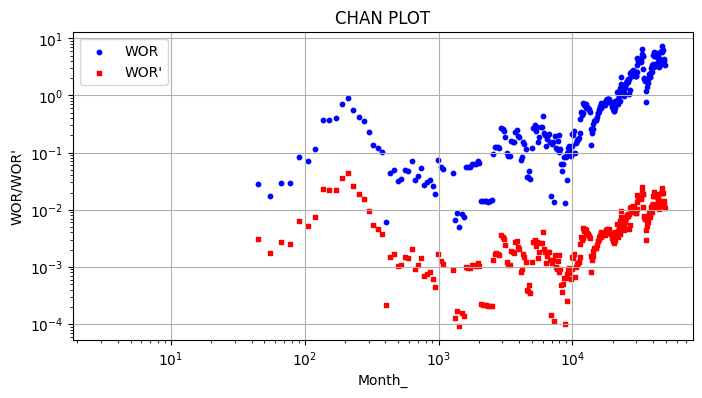

In [4]:
plt.figure(figsize=(8, 4))
plt.scatter(df1['Month_'], df1['WOR'], label='WOR', color='blue', marker='o', s=10)
plt.scatter(df1['Month_'], df1["WOR'"], label="WOR'", color='red', marker='s', s=10)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Month_')
plt.ylabel("WOR/WOR'")
plt.legend()
plt.title('CHAN PLOT')
plt.grid(True)
plt.show()

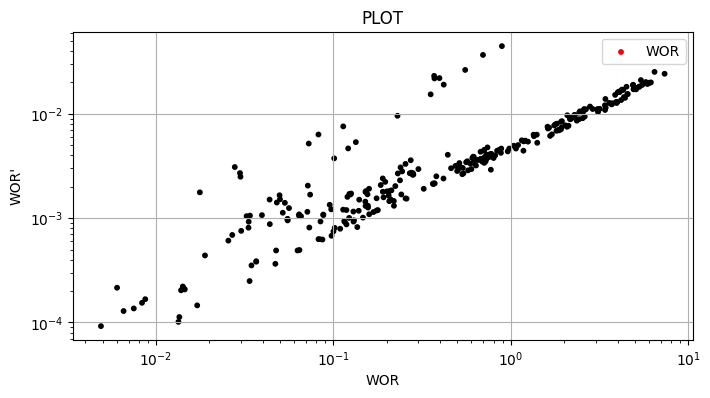

In [7]:
patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

point_patterns = []

for index, row in df1.iterrows():
    wor = row['WOR']
    wor_prime = row["WOR'"]

    pattern_matched = None
    for pattern_name, criteria in patterns.items():
        wor_range = criteria['WOR']
        wor_prime_range = criteria["WOR'"]
        
        if (wor_range[0] <= wor <= wor_range[1] and
            wor_prime_range[0] <= wor_prime <= wor_prime_range[1]):
            pattern_matched = pattern_name
            break  # Exit the loop once a pattern is found
    
    point_patterns.append(pattern_matched)

# Create a color map for different patterns
pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

# Create a list of colors corresponding to each point's pattern
point_colors = [pattern_colors[pattern] if pattern in pattern_colors else 'k' for pattern in point_patterns]

# Plot the points with colors
plt.figure(figsize=(8, 4))
plt.scatter(df1['WOR'], df1["WOR'"], label='WOR', c=point_colors, marker='o', s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('WOR')
plt.ylabel("WOR'")
plt.legend()
plt.title('PLOT')
plt.grid(True)
plt.show()


In [10]:
df1.reset_index(drop=True, inplace=True)

In [29]:
patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

# Initialize a variable to store the identified pattern for each row
pattern_found = []

# Iterate through the DataFrame rows up to the second-to-last row
for index, row in df3.iloc[:-1].iterrows():  # Exclude the last row
    wor_diff = abs(row['WOR'] - df3.at[index + 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df3.at[index + 1, "WOR'"])
    
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1] and
            wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break  # Exit the loop once a pattern is found
    
    # If no pattern matched, append None to indicate no pattern
    if not pattern_matched:
        pattern_found.append(None)
df3.reset_index(drop=True, inplace=True)
# Add the identified pattern information to the DataFrame
df3['Pattern'] = pattern_found

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_14872\2292549150.py:13: RuntimeWarning: invalid value encountered in double_scalars
  wor_diff = abs(row['WOR'] - df3.at[index + 1, 'WOR'])
C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_14872\2292549150.py:14: RuntimeWarning: invalid value encountered in double_scalars
  wor_prime_diff = abs(row["WOR'"] - df3.at[index + 1, "WOR'"])


ValueError: Length of values (621) does not match length of index (622)

In [30]:
# Initialize a variable to store the identified pattern for each row
pattern_found = []

# Iterate through the DataFrame rows up to the second-to-last row
for index, row in df3.iloc[:-1].iterrows():  # Exclude the last row
    wor_diff = abs(row['WOR'] - df3.at[index + 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df3.at[index + 1, "WOR'"])
    
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1] and
            wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break  # Exit the loop once a pattern is found
    
    # If no pattern matched, append None to indicate no pattern
    if not pattern_matched:
        pattern_found.append(None)

# Add a placeholder value (e.g., None) for the last row
pattern_found.append(None)

# Add the identified pattern information to the DataFrame
df3.reset_index(drop=True, inplace=True)
df3['Pattern'] = pattern_found


C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_14872\1286255782.py:6: RuntimeWarning: invalid value encountered in double_scalars
  wor_diff = abs(row['WOR'] - df3.at[index + 1, 'WOR'])
C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_14872\1286255782.py:7: RuntimeWarning: invalid value encountered in double_scalars
  wor_prime_diff = abs(row["WOR'"] - df3.at[index + 1, "WOR'"])


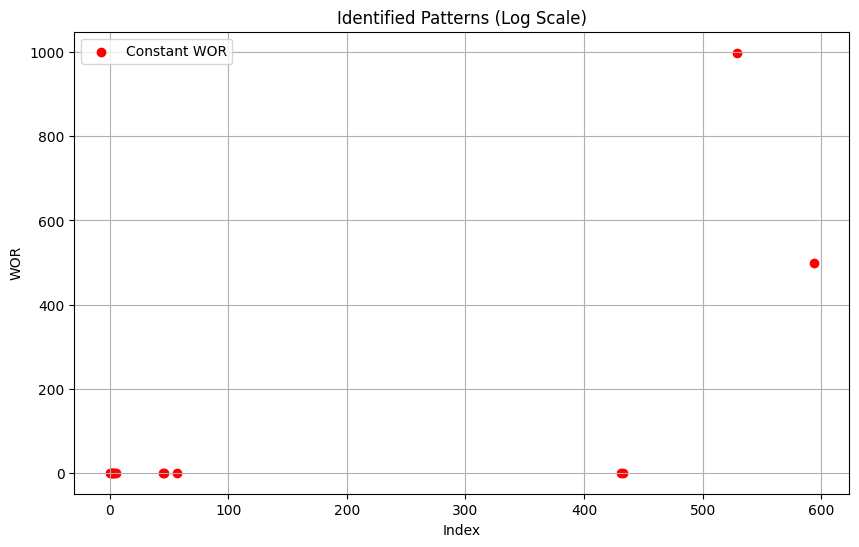

In [31]:
plt.figure(figsize=(10, 6))

# Define colors or markers for each pattern
pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

for pattern, color in pattern_colors.items():
    pattern_df = df3[df3['Pattern'] == pattern]
    if not pattern_df.empty:
        plt.scatter(pattern_df.index, pattern_df['WOR'], label=pattern, c=color)

plt.xlabel('Index')
plt.ylabel('WOR')
plt.legend()
plt.title('Identified Patterns (Log Scale)')
plt.grid(True)
plt.show()

In [32]:
df3

,MONTHLY OIL [m³],MONTHLY WATER [m³],Date,WOR,WOR',Month_,Pattern
0,118.3,0.0,1/1/1997,0.000000,0.000000,3,Constant WOR
1,9126.6,0.0,2/1/1997,0.000000,0.000000,6,Constant WOR
2,13228.3,0.0,3/1/1997,0.000000,0.000000,10,Constant WOR
3,10417.0,0.0,4/1/1997,0.000000,0.000000,15,Constant WOR
4,7370.6,0.0,5/1/1997,0.000000,0.000000,21,Constant WOR
...,...,...,...,...,...,...,...
617,26.5,72.1,2015-09-01 00:00:00,2.720755,0.012039,102534,None
618,60.4,37.9,2015-10-01 00:00:00,0.627483,0.002764,102761,None
619,18.9,75.3,2015-11-01 00:00:00,3.984127,0.017474,102989,None
620,33.6,81.4,2015-12-01 00:00:00,2.422619,0.010579,103218,None


In [34]:
df3['Pattern'].unique()

array(['Constant WOR', None], dtype=object)

In [36]:
df3['Pattern'].value_counts()

Constant WOR    13
Name: Pattern, dtype: int64

In [50]:
df3.isna().sum()

MONTHLY OIL [m³]          0
MONTHLY WATER [m³]        0
Date                      0
WOR                       0
WOR'                      0
Month_                    0
Pattern                   0
dtype: int64

In [49]:
df3=df3.dropna()

## Models

In [37]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df3.columns

Index(['MONTHLY OIL [m³]    ', 'MONTHLY WATER [m³]    ', 'Date', 'WOR', 'WOR'',
       'Month_', 'Pattern'],
      dtype='object')

In [55]:
X = df3[['WOR',"WOR'"]]  # Replace 'target_column_name' with the name of your target column
Y = df3['Pattern']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=42)

In [66]:
clf = svm.SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

In [70]:
!pip install imblearn

     ------------------------------------ 235.6/235.6 kB 232.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [79]:
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [77]:
clf.fit(X_train_resampled, Y_train_resampled)

NameError: name 'X_train_resampled' is not defined

clf.fit(X_train, Y_train)